In [129]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import

In [130]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

WORK_DIR = Path(Path.cwd()).parent
sys.path.append(str(WORK_DIR))
from src import ROOT, parse
from src.models import get_model
from src.datasets.transforms import *
from src.datasets import get_dataset, get_dataloader
from src.utils import *

cfg_dir = 'mlcv-exp/data/cfg/'

# Setup

In [131]:
dataset ='fpha'
model_name = 'hpo_hand'
exp = 'exp1'
epoch = 200

cfg_name = '{}_{}_{}.cfg'.format(dataset, model_name, exp)
cfg = parse(str(Path(ROOT)/cfg_dir/model_name/cfg_name))
cfg['device'] = '0'
cfg['aug'] = None
cfg['batch_size'] = 1
cfg['shuffle'] = 1
cfg['mode'] = 'test'
cfg['load_epoch'] = epoch
model = get_model(cfg)
model.net.eval()
clear_output()

# Loading

In [147]:
# seq_name = 'P20/P20_03_21943_open_drawer'
# seq_name = 'P03/P03_10_7118_open_juice'
# seq_name = 'P01/P01_03_502_put-down_milk'
# seq_name = 'P16/P16_01_20226_cut_fish'
# seq_name = 'P29/P29_04_35766_search-for_scissors'
# seq_name = 'P02/P02_09_5236_pour_salt'
# seq_name = 'P14/P14_01_19583_put_oil'
# seq_name = 'P17/P17_04_20464_take-out_spoon'
# seq_name = 'P01/P01_01_1_turn-on_light'
# seq_name = 'P01/P01_19_3995_move_chair'
# seq_name = 'P01/P01_01_2_close_door'
# seq_name = 'P23/P23_02_29040_search-for_table' #darker skinned
# seq_name = 'P01/P01_01_14_take_board'
seq_name = 'P01/P01_09_1549_take_potato'
# seq_name = 'P22/P22_07_25388_wash_sponge'
# seq_name = 'P01/P01_19_3937_rinse_pan'

In [148]:
dataset_file = 'EPIC_KITCHENS_2018'
img_format = 'jpg'
frame_id = 1
img_file = 'EK_frames'
img_file = img_file + '/' + seq_name
img_frame = 'img_{:05d}.{}'.format(frame_id, img_format) #6635 max
img_path = Path('datasets')/dataset_file/img_file
frame_path = img_path/img_frame
print(img_path)

datasets/EPIC_KITCHENS_2018/EK_frames/P01/P01_09_1549_take_potato


In [121]:
model.openpose_collect(Path(ROOT)/'datasets'/dataset_file/img_file, model_info='{}_{}_{}_{}'.format(dataset, model_name, exp, epoch))

100%|██████████| 60/60 [00:09<00:00,  5.42it/s]


# Detect Video

In [134]:
fps = 12
thresh = 0

In [ ]:
model.detect_video(Path(ROOT)/'datasets'/dataset_file/img_file, fps=fps, model_info='{}_{}_{}_{}_fps{}'.format(dataset, model_name, exp, epoch, fps), thresh=thresh)

In [149]:
model.detect_video(Path(ROOT)/'datasets'/dataset_file/img_file, seq_name=seq_name, fps=fps, model_info='{}_{}_{}_{}_fps{}'.format(dataset, model_name, exp, epoch, fps))

  0%|          | 0/60 [00:00<?, ?it/s]

/mnt/4TB/aaron/datasets/EPIC_KITCHENS_2018/EK_frames/P01/P01_09_1549_take_potato


t:   3%|▎         | 2/60 [00:00<00:04, 14.01it/s, now=None]

MoviePy - Building file /mnt/4TB/aaron/mlcv-exp/data/saved/P01_P01_09_1549_take_potato/detect_P01_P01_09_1549_take_potato_fpha_hpo_hand_exp1_200_fps12.gif with imageio.


# Collect Hands

In [280]:
data_file = 'EK_frames'
data_file = data_file + '/' + seq_name
thresh = 0.5

In [281]:
model.collect_hands_from_file(Path(ROOT)/'datasets'/dataset_file/data_file, model_info='{}_{}_{}_{}_{}_{}_{}'.format(dataset_file, dataset, model_name, exp, epoch, thresh, seq_name.split('/')[-1]), thresh=thresh)

  3%|▎         | 2/75 [00:00<00:05, 14.21it/s]

/mnt/4TB/aaron/datasets/EPIC_KITCHENS_2018/EK_frames/P01/P01_19_3937_rinse_pan


100%|██████████| 75/75 [00:04<00:00, 18.50it/s]


In [74]:
dts_folder = 'EK_frames'
thresh = 0.6

In [ ]:
model.collect_hands(Path(ROOT)/'datasets'/dataset_file/dts_folder, model_info='{}_{}_{}_{}_{}_{}'.format(dataset_file, dataset, model_name, exp, epoch, thresh), thresh=thresh)

# Show Img

In [125]:
print(str(Path(ROOT)/frame_path))
img = get_img_dataloader(str(Path(ROOT)/frame_path), int(cfg['img_rsz']))
img = img.unsqueeze(0).cuda()

/mnt/4TB/aaron/datasets/EPIC_KITCHENS_2018/EK_frames/P17/P17_04_20464_take-out_spoon/img_00001.jpg


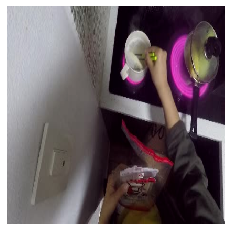

In [126]:
img_show = ImgToNumpy()(img.cpu())[0]
fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(img_show)
plt.show()

# Detect

159.91588711738586, 315.4523346424103, 100.02581548690796, 100.02581548690796


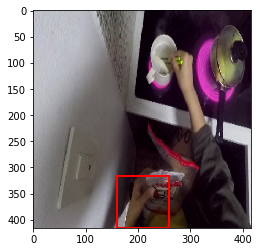

In [128]:
model.detect(img)

100%|██████████| 50/50 [00:03<00:00, 13.89it/s]
